# Support Vector Regression

In [2]:
# importng standard DS and ML libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# reading dataset and identifying target variables
data = pd.read_csv('Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

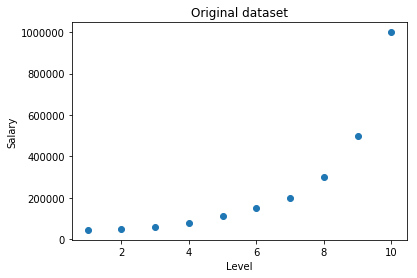

In [4]:
# visualizing original dataset
plt.scatter(X,y)
plt.xlabel('Level')
plt.ylabel('Salary')
plt.title('Original dataset')
plt.show()

In [5]:
# getting some statistical info
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


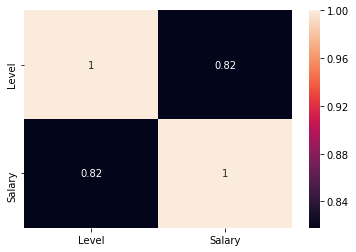

In [6]:
# generating correlation heatmap
sns.heatmap(data.corr(),annot=True)

In [7]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [8]:
# creating model and fitting data
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X,y)

C:\Users\Rishabh\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
# predicting new values 
pred = svr.predict([[5.5]])
pred = sc_y.inverse_transform(pred)
pred

array([252789.19575201])

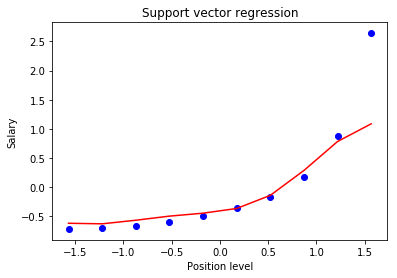

In [10]:
# visualizing results of support vector regression
plt.scatter(X, y, color = 'blue')
plt.plot(X, svr.predict(X), color = 'red')
plt.title('Support vector regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [11]:
# calculating estimator score on train dataset
svr.score(X,y)

0.7516001070620798

In [12]:
# calculating MAE
from sklearn import metrics
metrics.mean_absolute_error(X,y)

0.5283454710690595

In [13]:
# calculating MSE
metrics.mean_squared_error(X,y)

0.3641011850447602

In [14]:
# calculating RMSE
np.sqrt(metrics.mean_squared_error(X,y))

0.6034079756224309